In [358]:
import pandas as pd
import numpy as np
from sklearn import datasets
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [359]:
data=pd.read_csv("training1.csv") 
data

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.248,GIST.249,GIST.250,GIST.251,GIST.252,GIST.253,GIST.254,GIST.255,label,confidence
0,0.00000,0.00000,0.00000,0.00000,0.38041,0.000000,0.00000,0.34408,0.00000,0.000000,...,0.002636,0.010530,0.019534,0.007312,0.006031,0.012279,0.008195,0.001981,1.0,1.00
1,0.18344,0.25210,0.00000,0.92204,0.00000,0.000000,0.50573,0.00000,0.00000,0.000000,...,0.009092,0.023169,0.033257,0.025895,0.012712,0.022264,0.013579,0.006766,0.0,0.66
2,0.00000,0.00000,0.90988,0.00000,0.00000,1.635100,0.00000,0.00000,0.00000,0.000000,...,0.042372,0.048475,0.058971,0.035549,0.031402,0.032597,0.042116,0.043504,1.0,0.66
3,1.41250,0.00000,0.00000,0.00000,0.00000,0.000000,0.42192,0.00000,0.10667,0.022025,...,0.025496,0.011774,0.012197,0.021022,0.004930,0.027289,0.026245,0.018755,0.0,0.66
4,0.00000,0.00000,0.00000,0.00000,0.99100,0.000000,0.00000,0.00000,0.31629,0.000000,...,0.012905,0.003070,0.012571,0.008038,0.010983,0.016763,0.022079,0.008992,0.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.00000,0.88192,0.39819,0.00000,0.55703,0.301670,0.00000,0.16067,0.00000,0.000000,...,0.021710,0.026453,0.019867,0.025081,0.004316,0.023782,0.039083,0.014634,0.0,0.66
496,0.00000,0.68131,1.12850,0.00000,0.20669,1.371400,0.00000,0.00000,0.53689,0.349420,...,0.003196,0.029957,0.009862,0.014126,0.007185,0.016165,0.087648,0.002040,0.0,1.00
497,0.00000,0.00000,0.00000,0.00000,0.00000,0.037261,0.00000,0.27617,0.00000,0.737330,...,0.010193,0.026950,0.028674,0.040630,0.007284,0.013613,0.022770,0.006500,1.0,0.66
498,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.63104,0.00000,0.000000,...,0.034149,0.035261,0.024645,0.014841,0.013712,0.027508,0.020980,0.030109,0.0,0.66


In [360]:
# Splits label and features
X = data.iloc[:,:-2] #features
Y = data.iloc[:,-2] #label

In [361]:
#normalises the data
mean = X.mean(axis = 0)
X -= mean
std = X.std(axis = 0)
X/=std

In [362]:
#using a train validation split because the data set is large so validation data will be representative of the data set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [363]:
#PCA here
pca = PCA(n_components=8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [364]:
#sigmoid ideal for binary classification
model = Sequential()
model.add(Dense(8,input_dim = 8, activation = 'relu'))
model.add(Dense(6, activation= 'relu'))
model.add(Dense(4, activation= 'relu'))
model.add(Dense(2, activation= 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [365]:
#binary cross entropy ideal for binary classification as loss function
model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=('accuracy') )

In [366]:
# Fits the model with our training data
history = model.fit(x=X_train, y=y_train, validation_data= (X_test, y_test),epochs = 50, verbose= 1)

Epoch 1/50
13/13 [==============================] - 1s 20ms/step - loss: 1.1282 - accuracy: 0.4325 - val_loss: 1.0545 - val_accuracy: 0.3600
Epoch 2/50
13/13 [==============================] - 0s 7ms/step - loss: 0.8794 - accuracy: 0.4950 - val_loss: 0.9070 - val_accuracy: 0.4000
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.7657 - accuracy: 0.5550 - val_loss: 0.8061 - val_accuracy: 0.4400
Epoch 4/50
13/13 [==============================] - 0s 7ms/step - loss: 0.6904 - accuracy: 0.6050 - val_loss: 0.7465 - val_accuracy: 0.4800
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 0.6444 - accuracy: 0.6400 - val_loss: 0.6872 - val_accuracy: 0.5900
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 0.6132 - accuracy: 0.6725 - val_loss: 0.6552 - val_accuracy: 0.6400
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 0.5954 - accuracy: 0.6825 - val_loss: 0.6335 - val_accuracy: 0.6700
Epoch 8/50
13/13 [=

In [367]:
# loads second training set and imputes the missing values
data2 = pd.read_csv('training2.csv')
imputer = SimpleImputer(missing_values= np.nan, strategy= 'mean')
imputer.fit(data2)
data2 = imputer.transform(data2)
data2 = pd.DataFrame(data2)
data2

,0,1,2,3,4,5,6,7,8,9,...,2296,2297,2298,2299,2300,2301,2302,2303,2304,2305
0,0.000000,0.222115,0.000000,0.00000,0.182160,0.00000,0.000000,0.280583,0.246434,0.000000,...,0.015575,0.029132,0.014059,0.022082,0.001447,0.015603,0.026685,0.009647,1.0,0.66
1,0.000000,0.000000,0.217882,0.16782,0.000000,0.32345,0.181150,0.000000,0.246434,0.483060,...,0.005323,0.007308,0.007291,0.012836,0.009356,0.011722,0.008069,0.004156,0.0,1.00
2,0.000000,0.000000,0.217882,0.16782,0.000000,0.00000,0.000000,0.516630,0.000000,0.000000,...,0.009193,0.026669,0.025413,0.041616,0.015332,0.046411,0.021683,0.005538,0.0,0.66
3,0.000000,0.222115,0.000000,0.00000,0.000000,0.28243,0.000000,0.280583,0.246434,0.000000,...,0.036485,0.047011,0.014706,0.022082,0.012081,0.024815,0.026685,0.027789,1.0,0.66
4,0.000000,0.000000,0.492080,0.00000,0.093719,1.00890,0.000000,0.005596,0.000000,0.873550,...,0.004254,0.004420,0.024361,0.022082,0.013700,0.025730,0.037442,0.002809,0.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.000000,0.222115,0.217882,0.16782,0.000000,0.00000,0.000000,0.280583,0.275400,0.083087,...,0.021394,0.019756,0.046272,0.022082,0.009793,0.013420,0.026685,0.016782,1.0,0.66
2496,1.518800,0.000000,0.000000,0.00000,0.000000,0.37849,0.467530,0.000000,0.246434,1.518300,...,0.013590,0.021087,0.026359,0.022082,0.017944,0.014398,0.029873,0.009449,1.0,0.66
2497,0.352759,0.005252,0.217882,0.16782,0.000000,1.04780,0.000000,0.000000,0.000000,0.000000,...,0.037897,0.041965,0.013803,0.022082,0.002215,0.025696,0.024529,0.020519,0.0,1.00
2498,0.722630,0.000000,0.000000,0.16782,0.176520,0.00000,0.006398,0.280583,0.246434,0.000000,...,0.010358,0.025149,0.013911,0.035537,0.007868,0.013032,0.016016,0.008435,1.0,0.66


In [368]:
# selects samples with a confidence of 1
#data2 = data2.loc[data2[2305] == 1.00]
#data2

In [369]:
# Splits label and features
X_2 = data2.iloc[:,:-2] #features
Y_2 = data2.iloc[:,-2] #label

In [370]:
#using a train validation split because the data set is large so validation data will be representative of the data set
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, Y_2, test_size=0.2, random_state=1)

In [371]:
#normalises the data
mean = X_2.mean(axis = 0)
X_2 -= mean
std = X_2.std(axis = 0)
X_2/=std

In [372]:
#PCA here
pca2 = PCA(n_components=8)
X_2_train = pca2.fit_transform(X_2_train)
X_2_test = pca2.transform(X_2_test)

In [353]:
# Fits the model with our training data
history2 = model.fit(x=X_2_train, y=y_2_train, validation_data= (X_2_test, y_2_test),epochs = 50, verbose= 1)

Epoch 1/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6239 - accuracy: 0.6830 - val_loss: 0.5825 - val_accuracy: 0.7300
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6059 - accuracy: 0.6930 - val_loss: 0.5750 - val_accuracy: 0.7320
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 0.5971 - accuracy: 0.7005 - val_loss: 0.5704 - val_accuracy: 0.7320
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 0.5909 - accuracy: 0.7055 - val_loss: 0.5695 - val_accuracy: 0.7280
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 0.5871 - accuracy: 0.7085 - val_loss: 0.5679 - val_accuracy: 0.7320
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 0.5843 - accuracy: 0.7155 - val_loss: 0.5657 - val_accuracy: 0.7320
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.5811 - accuracy: 0.7210 - val_loss: 0.5658 - val_accuracy: 0.7280
Epoch 8/50
63/63 [==

In [354]:
# Loads in and imputes test data
test_data = pd.read_csv("test.csv")
test_data
imputer = SimpleImputer(missing_values= np.nan, strategy= 'mean')
imputer.fit(test_data)
test_data = imputer.transform(test_data)
test_data = pd.DataFrame(test_data)
test_data

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.057596,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.226056,2.076100,...,0.028997,0.097354,0.027028,0.019460,0.018146,0.035785,0.018323,0.026523,0.021467,0.019682
1,0.356431,0.876320,0.201441,0.162524,0.428320,0.000000,0.000000,0.288439,0.000000,0.000000,...,0.035176,0.004333,0.017242,0.019460,0.004741,0.012288,0.014772,0.025699,0.011461,0.009543
2,0.356431,0.006159,0.201441,0.462720,0.000000,0.294290,0.970090,0.188260,0.226056,0.187408,...,0.015263,0.016712,0.017242,0.019460,0.024419,0.031351,0.017709,0.026416,0.016798,0.002339
3,0.000000,0.375750,0.000000,0.595610,0.000000,0.000000,0.159250,1.038500,0.000000,0.000000,...,0.032599,0.047154,0.023493,0.023490,0.016420,0.006585,0.012430,0.022699,0.038670,0.013100
4,0.000000,0.000000,0.174800,0.162524,0.000000,0.000000,0.471720,0.000000,0.071534,0.000000,...,0.095485,0.014212,0.017242,0.006824,0.015591,0.029385,0.009836,0.113150,0.026197,0.013100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.356431,0.000000,0.201441,0.000000,0.000000,0.000000,0.000000,1.882600,0.000000,0.000000,...,0.021689,0.031779,0.013699,0.029542,0.020972,0.032924,0.018059,0.018804,0.017579,0.009621
996,0.000000,0.000000,0.102820,1.066000,0.299957,0.274883,0.239180,0.288439,0.283260,0.349600,...,0.034120,0.032340,0.017242,0.003935,0.019820,0.022867,0.015136,0.024139,0.010678,0.003097
997,0.356431,0.000000,0.000000,0.000000,0.000000,0.156010,0.165116,0.000000,0.226056,0.187408,...,0.034975,0.032340,0.022497,0.019460,0.024116,0.029179,0.031419,0.068388,0.046514,0.017884
998,0.490750,0.202618,0.000000,0.000000,0.000000,0.000000,0.773370,0.000000,0.000000,1.426400,...,0.042270,0.015863,0.017242,0.019460,0.024116,0.022867,0.030560,0.028728,0.037396,0.013100


In [355]:
test_data= pca.fit_transform(test_data)
test_data

array([[-8.21053888, -1.35263579,  0.40197189, ...,  1.38009445,
        -2.44557819, -0.44499394],
       [ 2.6935521 , -1.00925019,  5.90814235, ..., -1.31662742,
        -0.99374325, -2.80545828],
       [ 3.42429342,  1.54907907,  3.85492429, ..., -1.84114038,
        -0.25401433, -0.46682294],
       ...,
       [-2.30400435,  0.79959878,  1.04839846, ..., -3.43726658,
         2.7226606 ,  5.42018263],
       [ 0.28239287, -2.37743133,  2.22535589, ..., -1.43554786,
        -0.4843003 ,  0.62221922],
       [ 2.80064507,  0.05268071,  2.64954056, ...,  0.44750521,
        -0.60812241,  1.73656386]])

In [356]:
#Predicts the labels of the test data
predictions = model.predict(test_data)
predictions = np.rint(predictions)
predictions
pred_df = pd.DataFrame(predictions)
pred_df.columns = ["predictions"]
pred_df.to_csv('predictions.csv', index=False)

32/32 [==============================] - 0s 3ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

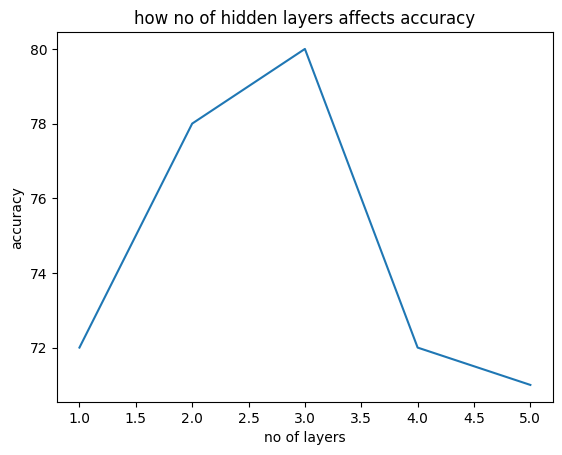

In [357]:
x_axis = [1,2,3,4,5]
y_axis = [72,78,80,72,71]
plt.plot(x_axis,y_axis)
plt.title('how no of hidden layers affects accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of layers')
plt.show